In [1]:


import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from rubin_sim.maf import radar



In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
data_loaded = pd.read_hdf('summary.h5')

In [17]:
# Pull out the metrics we are interested in and define simple names

name_dict = {'best18k parallax HealpixSlicer': 'parallax best 18k',
            'best18k properMotion HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 20_30 days UserPointsSlicer': '20-30d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO HealpixSlicer': 'fO N vis',
            'Total detected SNNSNMetric_reducen_sn DDF excluded HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_reducezlim DDF excluded HealpixSlicer': 'SNe, zlim',
            '3x2ptFoM Exgalm5WithCuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits gri band non-DD HealpixSlicer': 'WL Nvis \ni-band',
            'Total detected KNePopMetric_all_ztfrest_simple all models UserPointsSlicer': 'KNe ZTF simple',
             'Total detected KNePopMetric_single_ztfrest_simple single model UserPointsSlicer': 'KNe single model',
            'Total detected XRBPopMetric_early_detect UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7 HealpixSlicer': 'Brown Dwarf Vol',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO bright',
            'CumulativeCompleteness H <= 22.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO faint',
            'CumulativeCompleteness H <= 6.000000 DiscoveryNChances TNO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'TNO',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances Vatira 1 quad in 1 night detection loss MoObjSlicer': 'Vatira'}

# drop in the units for the columns
units = {'parallax best 18k': 'mas',
         'proper motion best 18k': 'mas/yr',
         '20-30d microlensing\ndetection': 'fraction', 
         '60-90d microlensing\ndetection': 'fraction', 
         'fO N vis' : '', 
         'SNe, N': '', 
         'SNe, zlim': '', 
         '3x2 i-band': 'score', 
         'WL Nvis \ni-band': '', 
         'KNe ZTF simple': 'N', 
         'KNe single model': 'N',
         'XRB\nearly detect': 'N', 
         'Brown Dwarf Vol': 'pc^3', 
         'NEO bright': 'fraction', 
         'NEO faint': 'fraction', 
         'TNO': 'fraction', 
         'Vatira': 'fraction'
        }

# If columns are uncertainties, we want to plot them backwards
invert_cols = ['parallax best 18k', 'proper motion best 18k']
# If columns are mags or fractions, we want to plot differences, not fractional differences.
mag_cols = ['20-30d microlensing\ndetection', '60-90d microlensing\ndetection','SNe, zlim',
            'NEO bright', 'NEO faint', 'TNO', 'Vatira']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    
fp_dict = {'FootprintFraction N year 1 u and night < 365 HealpixSlicer': 'u',
    'FootprintFraction N year 1 g and night < 365 HealpixSlicer': 'g',
    'FootprintFraction N year 1 r and night < 365 HealpixSlicer': 'r',
    'FootprintFraction N year 1 i and night < 365 HealpixSlicer': 'i',
    'FootprintFraction N year 1 z and night < 365 HealpixSlicer': 'z',
    'FootprintFraction N year 1 y and night < 365 HealpixSlicer': 'y',
}
    
    
fp_data = pd.DataFrame()
for key in fp_dict:
    fp_data[fp_dict[key]] = data_loaded[key]
    
mag_dict = {'Median CoaddM5 g HealpixSlicer': 'g',
 'Median CoaddM5 i HealpixSlicer': 'i',
 'Median CoaddM5 r HealpixSlicer': 'r',
 'Median CoaddM5 u HealpixSlicer': 'u',
 'Median CoaddM5 y HealpixSlicer': 'y',
 'Median CoaddM5 z HealpixSlicer': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    
    
ddf_dict = {'Sum SNNSNMetric DD:COSMOS_reducen_sn DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN COSMOS',
           'Sum SNNSNMetric DD:ECDFS_reducen_sn DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ECDFS',
           'Sum SNNSNMetric DD:EDFS_reducen_sn DD:EDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN EDFS',
           'Sum SNNSNMetric DD:ELAISS1_reducen_sn DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ELAISS1',
           'Sum SNNSNMetric DD:XMM_LSS_reducen_sn DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN XMM_LSS',
            
           'Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer': 'zlim COSMOS',
            'Median SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim ECDFS',
            'Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim EDFS',
            'Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer': 'zlim ELAISS1',
            'Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer': 'zlim XMM_LSS',
            
           }

ddf_data = pd.DataFrame()
for key in ddf_dict:
    ddf_data[ddf_dict[key]] = data_loaded[key]

In [5]:
data

,parallax best 18k,proper motion best 18k,20-30d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis \ni-band,KNe ZTF simple,KNe single model,XRB\nearly detect,Brown Dwarf Vol,NEO bright,NEO faint,TNO,Vatira
starter_v3.1_10yrs,0.808140,0.188156,0.3396,0.4749,795.0,118299.517334,0.302043,39.264445,422.0,3497.0,5408.0,2002.0,171783.514516,0.9280,0.636065,0.720482,0.0428
uy1_utw_100_v3.1_10yrs,0.782268,0.188238,0.3356,0.4574,798.0,123746.643167,0.306274,39.346099,425.0,3608.0,5521.0,2007.0,174536.973186,0.9234,0.637073,0.718047,0.0443
uy1_utw_12_v3.1_10yrs,0.775727,0.187733,0.3443,0.4825,799.0,125097.155196,0.306993,39.199942,425.0,3654.0,5439.0,1984.0,175927.595819,0.9256,0.642243,0.719842,0.0367
uy1_utw_150_v3.1_10yrs,0.783631,0.187597,0.3284,0.4625,798.0,123682.379949,0.305621,39.253593,425.0,3630.0,5492.0,1996.0,174606.129962,0.9248,0.635986,0.718216,0.0421
uy1_utw_200_v3.1_10yrs,0.784566,0.187882,0.3357,0.4610,798.0,123073.342158,0.306229,39.282452,425.0,3675.0,5539.0,1917.0,174427.886775,0.9268,0.637923,0.718598,0.0432
uy1_utw_24_v3.1_10yrs,0.781156,0.187582,0.3377,0.4698,798.0,124469.840457,0.305596,39.154781,425.0,3596.0,5618.0,1968.0,174721.970697,0.9240,0.637940,0.719924,0.0375
uy1_utw_50_v3.1_10yrs,0.783292,0.187940,0.3266,0.4501,798.0,124539.486343,0.306444,39.027690,425.0,3598.0,5570.0,2026.0,174834.318639,0.9260,0.637335,0.719675,0.0429


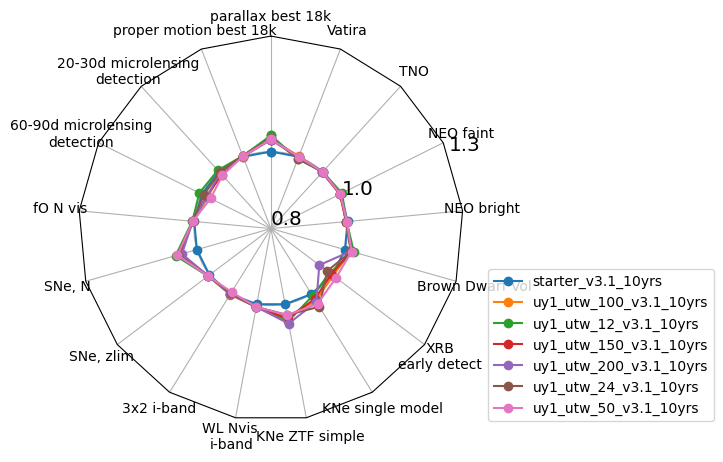

In [6]:
runs = [run for run in data.index ]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='starter_v3.1_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.3], bbox_to_anchor=(1.65, 0))

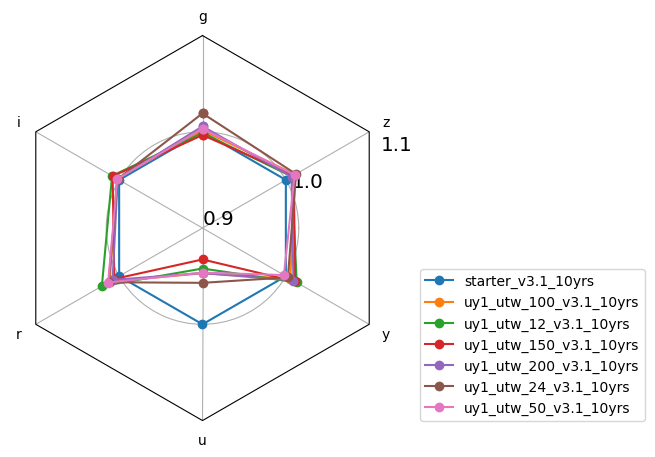

In [7]:

ndata = norm_df(mag_data, runs, cols=mag_data.columns.values.tolist(),
                mag_cols='all', norm_run='starter_v3.1_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(1.65, 0))

In [8]:
mag_data

,g,i,r,u,y,z
starter_v3.1_10yrs,26.698215,26.280980,26.811239,25.669870,24.766895,25.562311
uy1_utw_100_v3.1_10yrs,26.699618,26.283648,26.822617,25.616836,24.772234,25.573517
uy1_utw_12_v3.1_10yrs,26.696903,26.289467,26.831969,25.611907,24.779920,25.569391
uy1_utw_150_v3.1_10yrs,26.694885,26.288770,26.817044,25.602495,24.777870,25.571878
uy1_utw_200_v3.1_10yrs,26.703882,26.282820,26.819083,25.616564,24.775961,25.569180
uy1_utw_24_v3.1_10yrs,26.717396,26.282642,26.823804,25.626794,24.769368,25.574493
uy1_utw_50_v3.1_10yrs,26.701446,26.283132,26.824416,25.616182,24.764583,25.572760


In [9]:
temp = [col for col in data_loaded if "ECDFS" in col and "Coadd" in col]
for col in temp:
    print(data_loaded[col])

starter_v3.1_10yrs        28.353641
uy1_utw_100_v3.1_10yrs    28.346996
uy1_utw_12_v3.1_10yrs     28.353706
uy1_utw_150_v3.1_10yrs    28.359901
uy1_utw_200_v3.1_10yrs    28.352676
uy1_utw_24_v3.1_10yrs     28.351718
uy1_utw_50_v3.1_10yrs     28.353515
Name: Median DD:ECDFS CoaddM5 g band HealpixSubsetSlicer, dtype: float64
starter_v3.1_10yrs        27.883262
uy1_utw_100_v3.1_10yrs    27.881829
uy1_utw_12_v3.1_10yrs     27.878999
uy1_utw_150_v3.1_10yrs    27.880271
uy1_utw_200_v3.1_10yrs    27.879034
uy1_utw_24_v3.1_10yrs     27.883618
uy1_utw_50_v3.1_10yrs     27.879807
Name: Median DD:ECDFS CoaddM5 i band HealpixSubsetSlicer, dtype: float64
starter_v3.1_10yrs        28.311359
uy1_utw_100_v3.1_10yrs    28.303746
uy1_utw_12_v3.1_10yrs     28.304652
uy1_utw_150_v3.1_10yrs    28.303257
uy1_utw_200_v3.1_10yrs    28.308167
uy1_utw_24_v3.1_10yrs     28.303495
uy1_utw_50_v3.1_10yrs     28.303195
Name: Median DD:ECDFS CoaddM5 r band HealpixSubsetSlicer, dtype: float64
starter_v3.1_10yrs       

In [14]:
[col for col in data_loaded.columns if "FootprintF" in col]

['FootprintFraction N year 1 g and night < 365 HealpixSlicer',
 'FootprintFraction N year 1 i and night < 365 HealpixSlicer',
 'FootprintFraction N year 1 r and night < 365 HealpixSlicer',
 'FootprintFraction N year 1 u and night < 365 HealpixSlicer',
 'FootprintFraction N year 1 y and night < 365 HealpixSlicer',
 'FootprintFraction N year 1 z and night < 365 HealpixSlicer']

Index(['parallax best 18k', 'proper motion best 18k',
       '20-30d microlensing\ndetection', '60-90d microlensing\ndetection',
       'fO N vis', 'SNe, N', 'SNe, zlim', '3x2 i-band', 'WL Nvis \ni-band',
       'KNe ZTF simple', 'KNe single model', 'XRB\nearly detect',
       'Brown Dwarf Vol', 'NEO bright', 'NEO faint', 'TNO', 'Vatira'],
      dtype='object')

In [18]:
fp_data

,u,g,r,i,z,y
starter_v3.1_10yrs,0.752930,0.907474,0.987770,0.999135,0.991970,0.999163
uy1_utw_100_v3.1_10yrs,0.975167,0.898826,0.989623,0.997900,0.986411,0.998744
uy1_utw_12_v3.1_10yrs,0.076590,0.888820,0.992959,0.999876,0.992959,0.999581
uy1_utw_150_v3.1_10yrs,0.980050,0.872884,0.982211,0.997159,0.989006,0.997768
uy1_utw_200_v3.1_10yrs,0.976702,0.901050,0.980852,0.998023,0.987153,0.998326
uy1_utw_24_v3.1_10yrs,0.752930,0.907474,0.987770,0.999135,0.991970,0.999163
uy1_utw_50_v3.1_10yrs,0.969587,0.878567,0.990735,0.998888,0.987894,0.998465
